In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Downloads/flight_dataset.csv")
df.head(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [3]:
df.shape

(300153, 12)

In [4]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [6]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

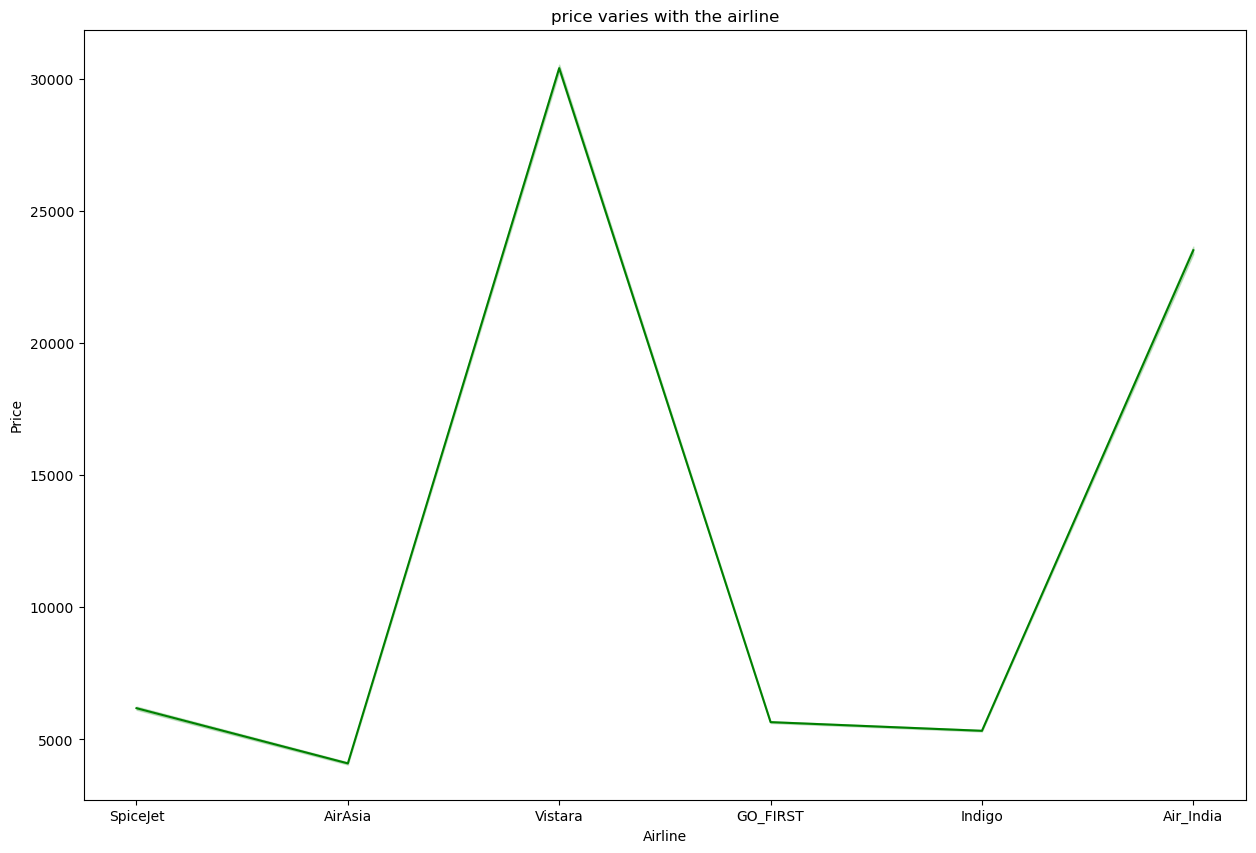

In [11]:
# DATA VISUALIZATION
plt.figure(figsize=(15,10))
sns.lineplot(x='airline', y='price', data=df, color='Green')
plt.title("price varies with the airline")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

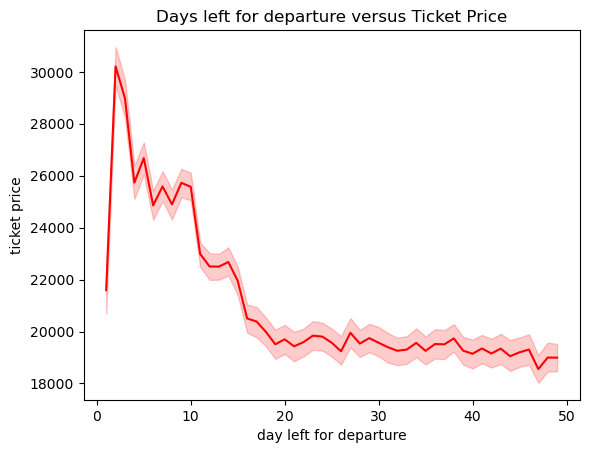

In [12]:
sns.lineplot(x='days_left', y='price',data=df, color = 'red')
plt.title("Days left for departure versus Ticket Price")
plt.xlabel("day left for departure")
plt.ylabel("ticket price")
plt.show()

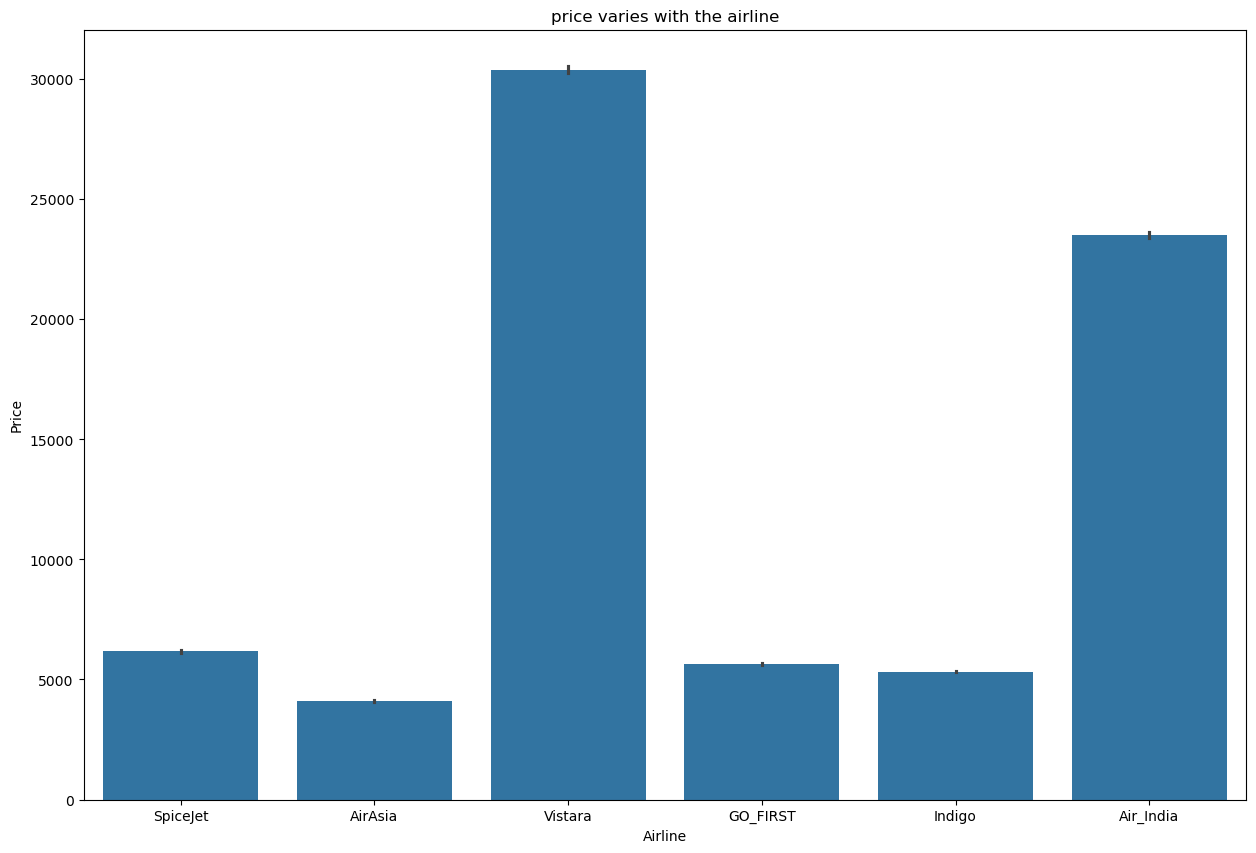

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x='airline', y='price', data=df)
plt.title("price varies with the airline")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

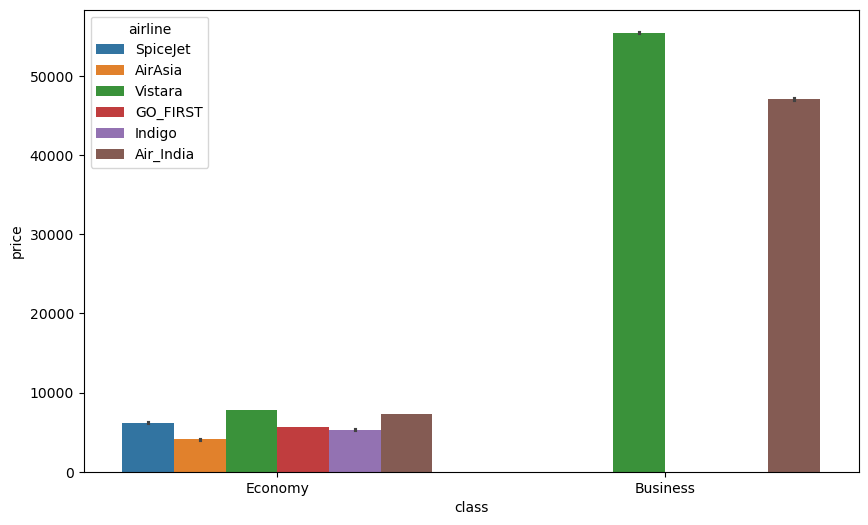

In [14]:
plt.figure(figsize=(10,6));
sns.barplot(x='class', y='price',data=df,hue='airline')
plt.show()

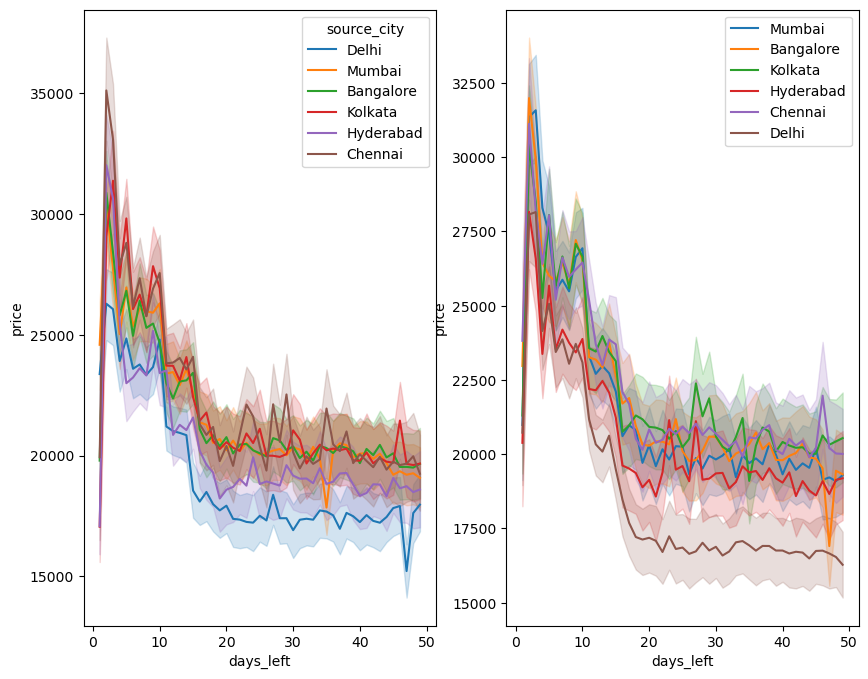

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
sns.lineplot(x='days_left',y='price',data = df, hue = 'source_city', ax = ax[0])
sns.lineplot(x='days_left',y='price',data = df, hue = 'destination_city', ax=ax[1])
plt.legend()
plt.show()

In [16]:
categorical_features = df[['airline', 'source_city',
                           'departure_time','stops', 'arrival_time', 
                           'destination_city', 'class']]


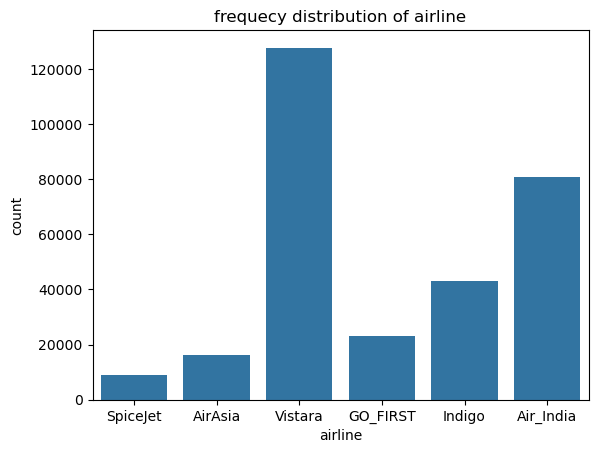

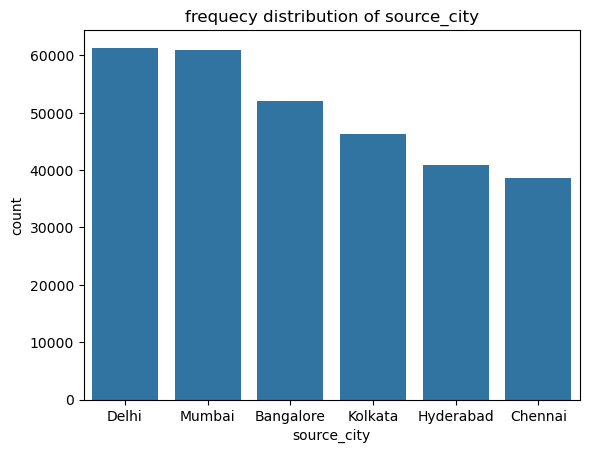

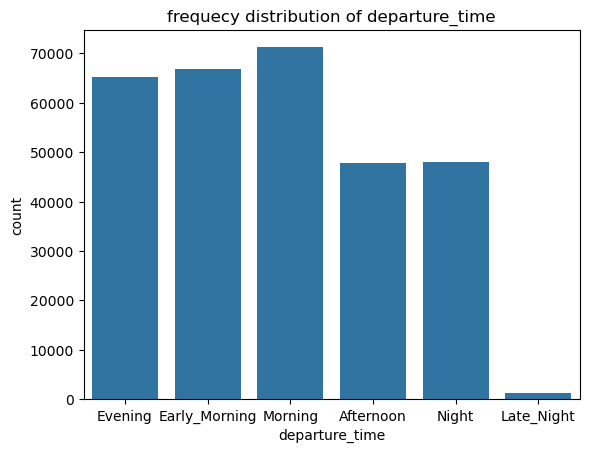

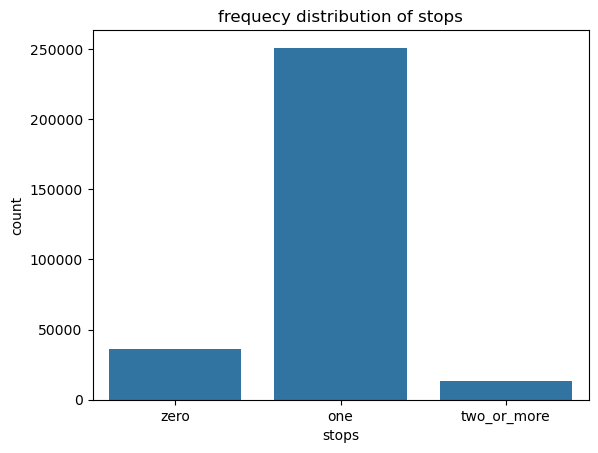

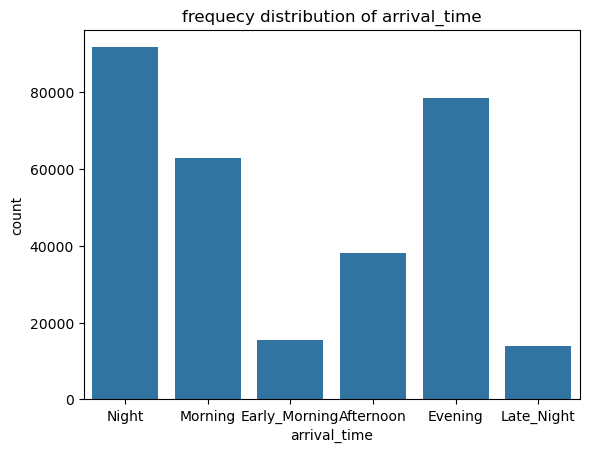

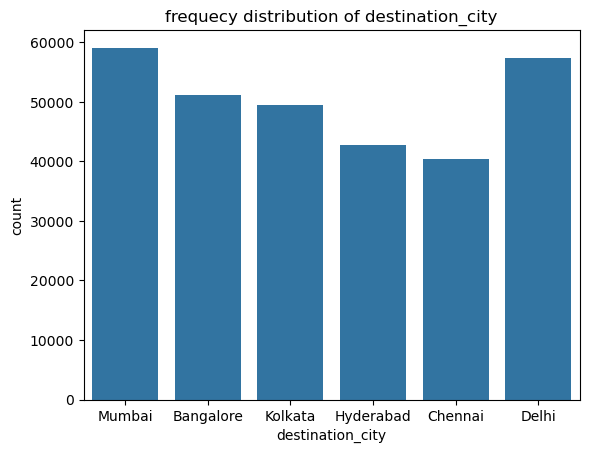

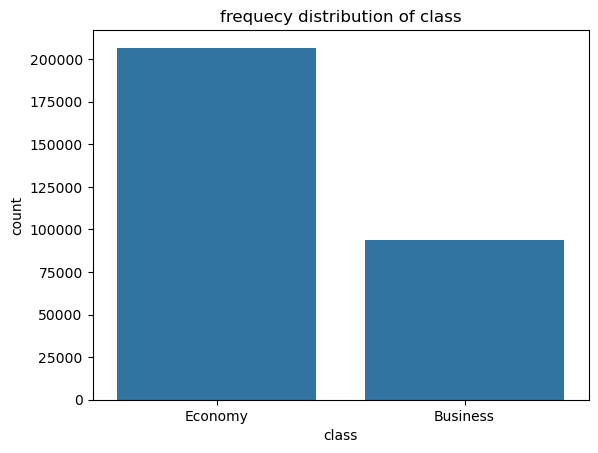

In [17]:
# VISULAIZATION OF CATEGORICAL FEATURE WITH COuntplot
for i in categorical_features:
    sns.countplot(x=df[i],data =df)
    plt.title(f"frequecy distribution of {i}")
    plt.show()
    

In [19]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['stops']=le.fit_transform(df['stops'])
df['class']=le.fit_transform(df['class'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


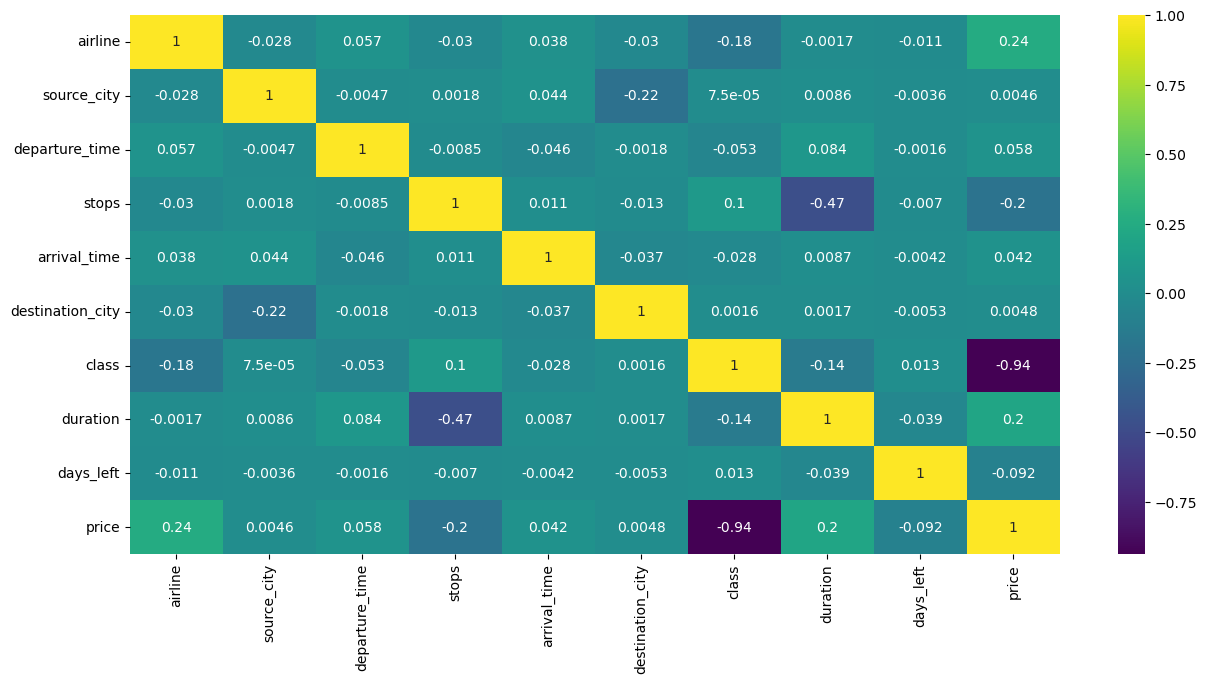

In [21]:
plt.figure(figsize=(15,7))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.show()

In [23]:
# FEATURE SELECTIONS
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[]
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):    
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] =x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)
    

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [31]:
x= df.drop(columns =["price","flight"])
y=df['price']


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

new_tabel =pd.DataFrame()
new_tabel["Actual vales"]= y_test
new_tabel["predicted values"]= y_pred

print(new_tabel)

                                               

        Actual vales  predicted values
27131           7366       4572.477222
266857         64831      52809.226907
141228          6195       7857.626650
288329         60160      56096.253996
97334           6578       6656.438105
...              ...               ...
5234            5026       5820.248216
5591            3001        486.438325
168314          6734       5837.956605
175191          5082      -1555.511279
287693         66465      58744.175762

[60031 rows x 2 columns]


In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)
root_mean_sq_er= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_er)



0.9045526175497736
4627.355215760311
0.43614483147133415
49201433.71164046
7014.373365571615


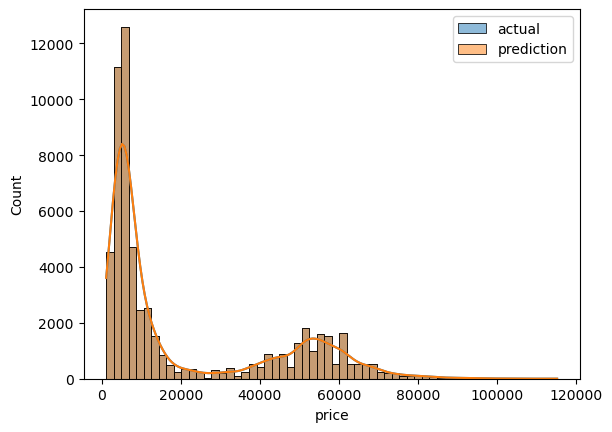

In [71]:
sns.histplot(y_test,label= "actual",kde=True)
sns.histplot(y_test,label= "prediction",kde=True)
plt.legend()

In [77]:
# DESCISION TREE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred =dt.predict(x_test)
print(r2_score(y_test,y_pred))

mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

mean_abs_perc_er=metrics.mean_absolute_percentage_error(y_test,y_pred)
print(mean_abs_perc_er)

mean_sq_er=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_er)

root_mean_sq_er= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_er)

0.9726685642494026
1298.8574708622768
0.08446270216739114
14088870.640619477
3753.514438578794


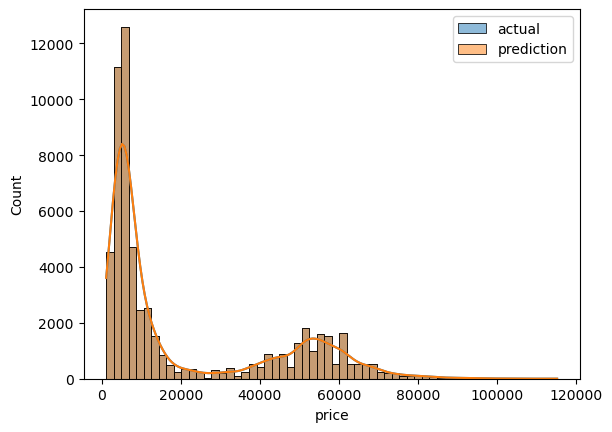

In [79]:
# /decision tree 
sns.histplot(y_test,label= "actual",kde=True)
sns.histplot(y_test,label= "prediction",kde=True)
plt.legend()

In [83]:
# RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print(r2_score(y_test, y_pred))

mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

mean_abs_perc_er=metrics.mean_absolute_percentage_error(y_test,y_pred)
print(mean_abs_perc_er)

mean_sq_er=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_er)

root_mean_sq_er= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_er)

0.9826594850830721
1195.1260230276528
0.07805170263404695
8938728.054232953
2989.770568828477


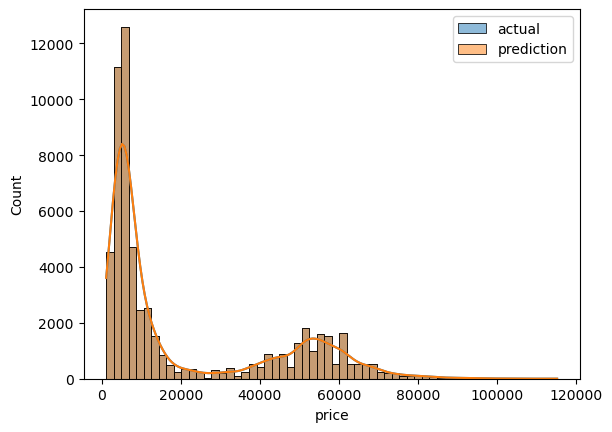

In [85]:
sns.histplot(y_test,label= "actual",kde=True)
sns.histplot(y_test,label= "prediction",kde=True)
plt.legend()